In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
# from scipy.optimize import curve_fit
from scipy.stats import multivariate_normal
import matplotlib.mlab as mlab
from matplotlib.patches import Ellipse
from scipy.stats import gaussian_kde

In [2]:
mpl.rcParams['text.usetex'] = True
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'

fontsize = 24
ticksize = 15
mpl.rcParams.update({'font.size': fontsize})

In [3]:
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.))) / sig / np.sqrt(2 * np.pi)

0.290297643 0.825918688
0.025601895577311275 0.019077567388287642
[[ 0.00065611 -0.00035391]
 [-0.00035391  0.00036432]]
[[ 1.         -0.72387217]
 [-0.72387217  1.        ]]
[[0.02561471        nan]
 [       nan 0.01908711]]
0.30878553 0.81597596
0.010512153 0.015375959
[[ 1.10615970e-04 -9.73027820e-05]
 [-9.73027820e-05  2.36656792e-04]]
[[ 1.        -0.6013909]
 [-0.6013909  1.       ]]
0.32941439100000003 0.8319803910000001
0.046442647466828565 0.03291016777596431
[[0.00215908 0.0012852 ]
 [0.0012852  0.00108416]]
[[1.        0.8400186]
 [0.8400186 1.       ]]
['PS-BI', 'Hist-BI', 'PI-CNN', 'Truth']


C:\Users\jacky\AppData\Local\Temp\ipykernel_18968\1016127495.py:25: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(np.cov(means_bi.T)))


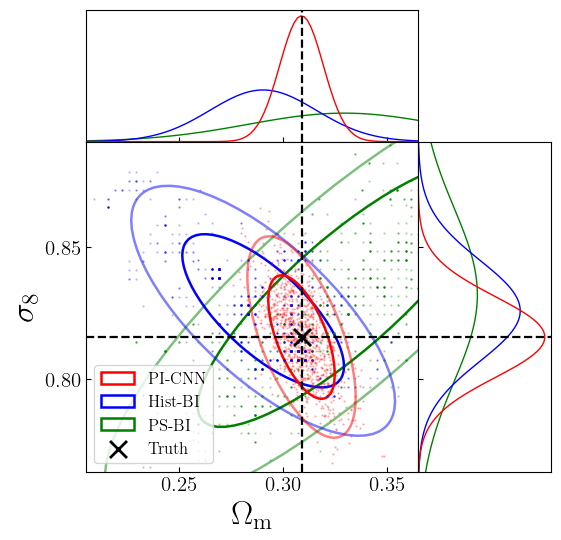

In [7]:
means_bi = np.load("means_10_smoo_s1_15000.npy")
means_ml = np.array([np.load("Om_test_1000_avg.npy"), np.load("s8_test_1000_avg.npy")]).T
# means_bi = np.load("means_10_smoo_s3_15000.npy")
# means_ml = np.array([np.load("Om_test_4_no_avg.npy"), np.load("s8_test_4_no_avg.npy")]).T
means_ps = np.load("means_10_smoo_s0.2_15000_PS.npy")

# means_bi = np.load("means_10_smoo_s0.2_15000_PS_0.3.npy")
# means_ml = np.load("means_10_smoo_s0.2_15000_PS_0.5.npy")
# means_ps = np.load("means_10_smoo_s0.2_15000_PS.npy")

ml_con_color = "red"
bi_con_color = "blue"
ps_con_color = "green"
ml_dot_color = "red"
bi_dot_color = "blue"
ps_dot_color = "green"
true_color = "black"

a = means_bi[:,0]
b = means_bi[:,1]
print(np.mean(a),np.mean(b))
print(np.std(a), np.std(b))
print(np.cov(means_bi.T))
print(np.corrcoef(means_bi.T))
print(np.sqrt(np.cov(means_bi.T)))
ab = np.vstack([a,b])
c = gaussian_kde(ab)(ab)
c = (c - c.min())/(c.max() - c.min())

d = means_ml[:,0]
e = means_ml[:,1]
print(np.mean(d),np.mean(e))
print(np.std(d), np.std(e))
print(np.cov(means_ml.T))
print(np.corrcoef(means_ml.T))
de = np.vstack([d,e])
f = gaussian_kde(de)(de)
f = (f - f.min())/(f.max() - f.min())

m = means_ps[:,0]
n = means_ps[:,1]
print(np.mean(m),np.mean(n))
print(np.std(m), np.std(n))
print(np.cov(means_ps.T))
print(np.corrcoef(means_ps.T))
mn = np.vstack([m,n])
o = gaussian_kde(mn)(mn)
o = (o - o.min())/(o.max() - o.min())

fig, ax = plt.subplots(2, 2, figsize=(6, 6), gridspec_kw={'width_ratios': [2.5,1], 'height_ratios': [1,2.5]})
for h in range(2):
    for v in range(2):
        ax[v, h].tick_params(direction="in", labelsize=ticksize, labelrotation=0)
        ax[v, h].locator_params(tight=True, nbins=4)
        
        yliml = 0.765 #0.8075
        ylimr = 0.890 #0.8245
        xliml = 0.205 #0.3045
        xlimr = 0.365 #0.3145
        xx = np.linspace(xliml, xlimr, 100)
        yy = np.linspace(yliml, ylimr, 100)

        if h > v:
            fig.delaxes(ax[v][h])
        if h == 0 and v ==0:
            ax[v,h].set_xlim(xliml,xlimr)
            ax[v,h].plot(xx, gaussian(xx, np.mean(np.array([m, n]).T, axis=0)[0], np.sqrt(np.cov(np.array([m, n]))[0,0])), lw=1, color=ps_con_color)
            ax[v,h].plot(xx, gaussian(xx, np.mean(np.array([a, b]).T, axis=0)[0], np.sqrt(np.cov(np.array([a, b]))[0,0])), lw=1, color=bi_con_color)
            ax[v,h].plot(xx, gaussian(xx, np.mean(np.array([d, e]).T, axis=0)[0], np.sqrt(np.cov(np.array([d, e]))[0,0])), lw=1, color=ml_con_color)
            ax[v,h].set_ylim(bottom=0)
            ax[v,h].tick_params(left=False)
            ax[v,h].set_yticklabels([])
            ax[v,h].axvline(0+0.3089,c=true_color,lw=1.6,ls="dashed")
        if h == 1 and v == 1:
            ax[v,h].set_ylim(yliml,ylimr)
            ax[v,h].plot(gaussian(yy, np.mean(np.array([m, n]).T, axis=0)[1], np.sqrt(np.cov(np.array([m, n]))[1,1])), yy, lw=1, color=ps_con_color)
            ax[v,h].plot(gaussian(yy, np.mean(np.array([a, b]).T, axis=0)[1], np.sqrt(np.cov(np.array([a, b]))[1,1])), yy, lw=1, color=bi_con_color)
            ax[v,h].plot(gaussian(yy, np.mean(np.array([d, e]).T, axis=0)[1], np.sqrt(np.cov(np.array([d, e]))[1,1])), yy, lw=1, color=ml_con_color)
            ax[v,h].set_xlim(left=0)
            ax[v,h].tick_params(bottom=False)
            ax[v,h].set_xticklabels([])
            ax[v,h].axhline(0+0.8159,c=true_color,lw=1.6,ls="dashed")
        if h == 0 and v == 1:
            alpha = [0, 1.52, 2.48, 3.44]

            cov_error = np.cov(np.array([m, n]))
            mean_error = np.mean(np.array([m, n]).T, axis=0)
            # print(mean_error)
            m2 = (cov_error[0,0] + cov_error[1,1]) / 2 + np.sqrt((cov_error[0,0] - cov_error[1,1])**2 / 4 + cov_error[0,1]**2)
            n2 = (cov_error[0,0] + cov_error[1,1]) / 2 - np.sqrt((cov_error[0,0] - cov_error[1,1])**2 / 4 + cov_error[0,1]**2)
            tan2th_ps = 2 * cov_error[0,1] / (cov_error[0,0] - cov_error[1,1])
            m3 = np.sqrt(m2)
            n3 = np.sqrt(n2)
            th_ps = np.degrees(np.arctan(tan2th_ps) / 2)
            th_ps = np.degrees(np.arctan2(2 * cov_error[0,1], cov_error[0,0] - cov_error[1,1]) / 2)
            ellipse = Ellipse(xy=(mean_error[0], mean_error[1]), width=alpha[3]*m3*2, height=alpha[3]*n3*2, angle=th_ps, color=ps_con_color, alpha=0.1, fill=False, lw=1.8)
            # ax[v,h].add_patch(ellipse)
            ellipse = Ellipse(xy=(mean_error[0], mean_error[1]), width=alpha[2]*m3*2, height=alpha[2]*n3*2, angle=th_ps, color=ps_con_color, alpha=0.5, fill=False, lw=1.8)
            ax[v,h].add_patch(ellipse)
            ellipse = Ellipse(xy=(mean_error[0], mean_error[1]), width=alpha[1]*m3*2, height=alpha[1]*n3*2, angle=th_ps, color=ps_con_color, alpha=1, fill=False, lw=1.8, label=r"PS-BI")
            ax[v,h].add_patch(ellipse)

            cov_error = np.cov(np.array([a, b]))
            mean_error = np.mean(np.array([a, b]).T, axis=0)
            # print(mean_error)
            a2 = (cov_error[0,0] + cov_error[1,1]) / 2 + np.sqrt((cov_error[0,0] - cov_error[1,1])**2 / 4 + cov_error[0,1]**2)
            b2 = (cov_error[0,0] + cov_error[1,1]) / 2 - np.sqrt((cov_error[0,0] - cov_error[1,1])**2 / 4 + cov_error[0,1]**2)
            tan2th_bi = 2 * cov_error[0,1] / (cov_error[0,0] - cov_error[1,1])
            a3 = np.sqrt(a2)
            b3 = np.sqrt(b2)
            th_bi = np.degrees(np.arctan(tan2th_bi) / 2)
            th_bi = np.degrees(np.arctan2(2 * cov_error[0,1], cov_error[0,0] - cov_error[1,1]) / 2)
            ellipse = Ellipse(xy=(mean_error[0], mean_error[1]), width=alpha[3]*a3*2, height=alpha[3]*b3*2, angle=th_bi, color=bi_con_color, alpha=0.1, fill=False, lw=1.8)
            # ax[v,h].add_patch(ellipse)
            ellipse = Ellipse(xy=(mean_error[0], mean_error[1]), width=alpha[2]*a3*2, height=alpha[2]*b3*2, angle=th_bi, color=bi_con_color, alpha=0.5, fill=False, lw=1.8)
            ax[v,h].add_patch(ellipse)
            ellipse = Ellipse(xy=(mean_error[0], mean_error[1]), width=alpha[1]*a3*2, height=alpha[1]*b3*2, angle=th_bi, color=bi_con_color, alpha=1, fill=False, lw=1.8, label=r"Hist-BI")
            ax[v,h].add_patch(ellipse)

            cov_error = np.cov(np.array([d, e]))
            mean_error = np.mean(np.array([d, e]).T, axis=0)
            # print(mean_error)
            d2 = (cov_error[0,0] + cov_error[1,1]) / 2 + np.sqrt((cov_error[0,0] - cov_error[1,1])**2 / 4 + cov_error[0,1]**2)
            e2 = (cov_error[0,0] + cov_error[1,1]) / 2 - np.sqrt((cov_error[0,0] - cov_error[1,1])**2 / 4 + cov_error[0,1]**2)
            tan2th_ml = 2 * cov_error[0,1] / (cov_error[0,0] - cov_error[1,1])
            d3 = np.sqrt(d2)
            e3 = np.sqrt(e2)
            th_ml = np.degrees(np.arctan(tan2th_ml) / 2)
            th_ml = np.degrees(np.arctan2(2 * cov_error[0,1], cov_error[0,0] - cov_error[1,1]) / 2)
            ellipse = Ellipse(xy=(mean_error[0], mean_error[1]), width=alpha[3]*d3*2, height=alpha[3]*e3*2, angle=th_ml, color=ml_con_color, alpha=0.1, fill=False, lw=1.8)
            # ax[v,h].add_patch(ellipse)
            ellipse = Ellipse(xy=(mean_error[0], mean_error[1]), width=alpha[2]*d3*2, height=alpha[2]*e3*2, angle=th_ml, color=ml_con_color, alpha=0.5, fill=False, lw=1.8)
            ax[v,h].add_patch(ellipse)
            ellipse = Ellipse(xy=(mean_error[0], mean_error[1]), width=alpha[1]*d3*2, height=alpha[1]*e3*2, angle=th_ml, color=ml_con_color, alpha=1, fill=False, lw=1.8, label=r"PI-CNN")
            ax[v,h].add_patch(ellipse)

            ax[v,h].scatter(m, n, c=ps_dot_color, s=0.35, alpha=0.30)

            # ax.scatter(a, b, c=c, s=3)
            ax[v,h].scatter(a, b, c=bi_dot_color, s=0.35, alpha=0.25)
            # ax[v,h].scatter(np.load("means_10_smoo_s3_15000.npy")[:,0], np.load("means_10_smoo_s3_15000.npy")[:,1], c=bi_dot_color, s=0.35, alpha=0.25)
            # ax[v,h].tricontour(a, b, c, [0.003, 0.05, 0.32], linewidths=1.5, colors='blue')

            ax[v,h].scatter(d, e, c=ml_dot_color, s=0.35, alpha=0.30)
            # ax[v,h].tricontour(d, e, f, [0.003, 0.05, 0.32], linewidths=1.5, colors='red')

            ax[v,h].axvline(0+0.3089,c=true_color,lw=1.6,ls="dashed")
            ax[v,h].axhline(0+0.8159,c=true_color,lw=1.6,ls="dashed")
            ax[v,h].scatter(0.3089,0.8159,marker="x",c=true_color,s=150,lw=2, label=r"Truth")

            ax[v,h].set_ylim(yliml,ylimr)
            ax[v,h].set_xlim(xliml,xlimr)
            ax[v,h].set_ylabel(r"$\sigma_8$")
            ax[v,h].set_xlabel(r"$\Omega_{\rm{m}}$")
            # ax[v,h].set_xticks([0.305, 0.309, 0.313])
            handles, labels = ax[v,h].get_legend_handles_labels()
            print(labels)
            order = [2,1,0,3]
            ax[v,h].legend([handles[idx] for idx in order],[labels[idx] for idx in order],fontsize="12",loc="lower left")
            # ax[v,h].legend(fontsize="15")

        if h != 0:
            ax[v, h].set_yticklabels([])
        if v != range(2)[-1]:
            ax[v, h].set_xticklabels([])

plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig("contours.pdf", dpi=300)
plt.show()

In [21]:
cov_error = np.cov(np.array([a, b]))
print(cov_error)
print(np.sqrt(cov_error))

[[ 1.96746358e-05 -4.08646765e-06]
 [-4.08646765e-06  2.00521845e-05]]
[[0.00443561        nan]
 [       nan 0.00447797]]


<ipython-input-21-a1394176709c>:3: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(cov_error))
